In [8]:
import numpy as np
import matplotlib.pyplot as plt

def findInter(array1,array2):
    
    intersecpart = np.argwhere(np.diff(np.sign(array1-array2)) != 0).reshape(-1) + 0
    
    return intersecpart

def PtfixeFoncX(alphabar,alpha,phi,i,deltal,pirange,size = 10000.0):
    
    # The A must be here so that it goes just a bit further than requested, so we are certain that 
    # all points are taken. This only works for pirange = 0,2,4,6,8, etc ....

    A = 1

    x = np.linspace(0,pirange*A*np.pi,size)
  
    
    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(x)):
        
        if np.absolute(np.cos(x[index-realindex])) < i/2.0:
            x = np.delete(x,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(x))
    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -2.0*alpha*x

    RHS = np.sin(x)*np.sqrt((o-(i**2.0)/(4.0*(np.cos(x)**2.0))))
    

    return LHS,RHS,x


def PtfixeFoncY(alphabar,alpha,phi,i,deltal,pirange,size=10000):
    

    # The A must be here so that it goes just a bit further than requested, so we are certain that 
    # all points are taken. This only works for pirange = 0,2,4,6,8, etc ....

    A = 1
    
    y = np.linspace(0,pirange*A*np.pi,size)


    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    
        # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(y)):
        
        if np.absolute(np.sin(y[index-realindex])) < i/2.0:
            y = np.delete(y,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(y))
    
    
    decalage2 = np.pi*(np.arange(len(y))-(np.arange(len(y)))%(size/(pirange)))/(size/(pirange))
    
    
    signe = ((-1)**((decalage2/np.pi + 0.0001).astype(int)))

    alphaxterm = 2.0*alpha*(np.arccos((signe*i/(np.sin(y)*2.0)))+decalage2)
    
    #alphaxterm = 2.0*alpha*(np.arccos((i/(np.sin(y)*2.0))))

    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -alphaxterm 

    RHS = np.cos(y)*np.sqrt((o-(i**2.0)/(4.0*(np.sin(y)**2.0))))

    return LHS,RHS,y


def FindEigVect(ptFixeX,ptFixeY,eta,alpha):
    
    eingval = np.zeros((len(ptFixeY),4),dtype='complex')
    eingvect = np.zeros((len(ptFixeY)*4,4),dtype='complex')
    
    for pos in range(len(ptFixeX)):
        
        Jacobian = np.array([[0,0,1,0], 
                     [0,0,0,1],  
                     [-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos]) + 2.0*alpha), 
                                      np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]), -eta,0],
                     [np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]),-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos])), 0,-eta]])
        
        eingval[pos,:],eingvect[range(pos + 3*pos,pos + 3*pos +4 ),:] = np.linalg.eig(Jacobian)
        
    return eingvect,eingval

In [9]:
# Finding fixed points 

def PtFixesXY(deltal,phi,i,alpha,pirange,size = 10000.0):

    LHS,RHS,x = PtfixeFoncX(alpha*2*np.pi,alpha,phi,i,deltal,pirange,size)
    
    # To take into account periodicity
    
    A = 1
    
    decalage = np.pi*(np.arange(len(x))-(np.arange(len(x)))%(size/(pirange*A*0.5)))/(size/(pirange*A*0.5))
    
    signe = ((-1)**((decalage/np.pi*1.0+ 0.0001).astype(int)))
    
    possibleY = np.arcsin(i/(-signe*2.0*np.cos(x)))+decalage
    possibleY = np.arcsin(i/(2.0*np.cos(x)))
    
    posPtfixe = findInter(LHS,RHS) 
    
    ptFixeX= x[posPtfixe]

    ptFixeY = possibleY[posPtfixe]
    
    return ptFixeX,ptFixeY

def PtFixesYX(deltal,phi,i,alpha,pirange,size = 10000.0):

    LHS,RHS,y = PtfixeFoncY(alpha*2*np.pi,alpha,phi,i,deltal,pirange,size)

    # To take into account periodicity
    
    A = 1
    
    decalage = np.pi*(np.arange(len(y))-(np.arange(len(y)))%(size/(pirange)))/(size/(pirange))
    
    signe = ((-1)**((decalage/np.pi*1.0+ 0.0001).astype(int)))
    
    possibleX = np.arccos(signe*i/(2.0*np.sin(y)))+decalage
    
    #possibleX = np.arccos(i/(2.0*np.sin(y)))
    
    
    posPtfixe = findInter(LHS,RHS) 
    
    ptFixeY= y[posPtfixe]

    ptFixeX = possibleX[posPtfixe]
    
    return ptFixeX,ptFixeY 


def solSysteme(deltal,phi,eta,i,alpha,pirange,size = 10000.0):

    # find the fixed points
    
    ptFixeX1,ptFixeY1 = PtFixesXY(deltal,phi,i,alpha,pirange,size)

    ptFixeX2,ptFixeY2 = PtFixesYX(deltal,phi,i,alpha,pirange,size)
    
    # find the eingenvalues and vectors
    
    eingvect1,eingvalue1 = FindEigVect(ptFixeX1,ptFixeY1,eta,alpha)
    eingvect2,eingvalue2 = FindEigVect(ptFixeX2,ptFixeY2,eta,alpha)
    
    
    
    return ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2
    

/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


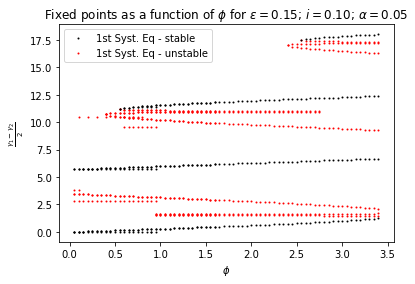

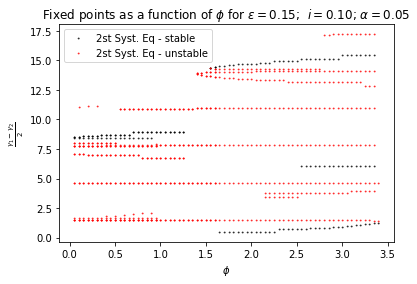

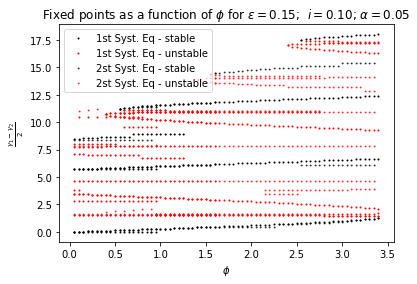

In [18]:
plt.figure(1)

# Plot for i = 0.1, i = 0.25, i = 0.5 
# Plot for size = 10**5, se acabar rapido, aumenta para 10**6
# Se range(1,1000,1) demorar muito, faz para range(1,100,1) et muda o i para i = coef/100.0
 

deltal  = 0
phi = 0.5 
eta = 0.15
i = 0.1

alpha = 0.05
size = 100.0

for coef in range(1,20,1):

    phi = coef/20.0
  
    ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha,30,size)
    
    for npointfixe in range(len(ptFixeX1)):
        if  max(eingvalue1[npointfixe,:]) < 0:
            plt.figure(1)
            plot1, =  plt.plot(phi,ptFixeX1[npointfixe],'ko',markersize=1,label = r'1st Syst. Eq - stable',mfc='none')
            plt.figure(3)
            plot2, = plt.plot(phi,ptFixeX1[npointfixe],'ko',markersize=1,label = r'1st Syst. Eq - stable',mfc='none')
        else:
            plt.figure(1)
            plot3, = plt.plot(phi,ptFixeX1[npointfixe],'ro',markersize=1,label = r'1st Syst. Eq - unstable',mfc='none')
            plt.figure(3)
            plot4, = plt.plot(phi,ptFixeX1[npointfixe],'ro',markersize=1,label = r'1st Syst. Eq - unstable',mfc='none')
    
    for npointfixe2 in range(len(ptFixeX2)):
        if  max(eingvalue2[npointfixe2,:]) < 0:
            plt.figure(2)
            plot5, = plt.plot(phi,ptFixeX2[npointfixe2],'k<',markersize=1,label = r'2st Syst. Eq - stable',mfc='none')
            
            plt.figure(3)
            plot6, = plt.plot(phi,ptFixeX2[npointfixe2],'k<',markersize=1,label = r'2st Syst. Eq - stable',mfc='none')
        else:
            plt.figure(2)
            plot7, = plt.plot(phi,ptFixeX2[npointfixe2],'r<',markersize=1,label = r'2st Syst. Eq - unstable',mfc='none')

            
            plt.figure(3)
            plot8, = plt.plot(phi,ptFixeX2[npointfixe2],'r<',markersize=1,label = r'2st Syst. Eq - unstable',mfc='none')
            
            
            
plt.figure(1)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\phi$')
#plt.axis([0,20,0,40])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$; $i = $%.2f; $\alpha = 0.05$'%i)
plt.legend(handles=[plot1,plot3])
plt.savefig('xvsPhi_%.2f_2.pdf'%i)

plt.figure(2)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\phi$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$;  $i = $%.2f; $\alpha = 0.05$'%i)
plt.legend(handles=[plot5,plot7])
plt.savefig('xvsPhi__%.2f_2.pdf'%i)

plt.figure(3)
plt.xlabel(r'$\phi$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$;  $i = $%.2f; $\alpha = 0.05$'%i)
plt.legend(handles=[plot2,plot4,plot6,plot8])
plt.savefig('xvsPhi_%.2f_2.pdf'%i)



plt.show()